#### <b>2.1.1 预训练数据集</b>

In [4]:
import pandas as pd
# 设置最大列宽
pd.set_option('display.max_colwidth',30) 
news = pd.read_csv('./data/people.cn/RenMin_Daily.csv')
news.head()

,id,date,title,content
0,20210101-01-01,20210101,中俄两国元首互致新年贺电 中俄两国总理互致新年贺电,新华社北京12月31日电 2020年12月31日...
1,20210101-01-02,20210101,国家主席习近平发表二〇二一年新年贺词,■ 2020年是极不平凡的一年。面对突如其来的新...
2,20210101-01-03,20210101,艰难方显勇毅，磨砺始得玉成 ——习近平主席二〇二一年...,新故相推，日生不滞。在风雨兼程中，我们告别202...
3,20210101-01-04,20210101,全国政协举行新年茶话会 习近平发表重要讲话李克强栗战...,新华社北京12月31日电 中国人民政治协商会议全...
4,20210101-02-01,20210101,在全国政协新年茶话会上的讲话 （2020年12月31日）,同志们，朋友们：\n 在风雨兼程中，我们即将送别2...


In [5]:
print(news.iloc[30000:30003])

                   id      date                          title  \
30000  20220412-12-02  20220412  重庆白鹤梁水下博物馆用科技手段保障文物安全 千年题刻...   
30001  20220412-12-03  20220412                  甘肃出台方案加强科技创新    
30002  20220412-12-04  20220412       挖掘永泰庄寨的价值（新语·让好声音成为最强音）    

                             content  
30000  　　乘坐长91米的隧道式自动扶梯渐入水下，横穿146...  
30001  　　本报兰州4月11日电  （记者付文）11日，甘肃...  
30002  　　承载着村落历史、维系着村民记忆的乡村文化遗产，能...  


In [6]:
# 查看行数和列数
rows, cols = news.shape
print(f'行数: {rows}, 列数: {cols}')

行数: 90719, 列数: 4


将数据表中content列所有的资讯提取，合并到一个文本文件中。

In [7]:
# 将目标列转换为字符串,因为资讯中可能含有浮点数字等
news['content'] = news['content'].astype(str)

# 个人电脑处理400MB的文本还是太大了，所以指定行号列表,抽取部分数据做实验，例如1/25的数据量
rows = [x for x in range(1, news.shape[0]) if x % 25 == 0]  # 筛选数据行

# 提取目标列（列名为 'content'）
texts = news['content'].iloc[rows]

# 分段合并（每段以两个换行分隔）
merged_text = '\n\n'.join(texts)

# 将结果写入文本文件
with open('./data/people.cn/news.txt', 'w', encoding='utf-8') as f:
    f.write(merged_text)

print("文本已成功写入 news.txt 文件！")


文本已成功写入 news.txt 文件！


In [8]:
import gc
# 使用完 数据集 后删除
del news, texts, merged_text
# 调用垃圾回收
gc.collect()

818

In [9]:
# 读取新数据集
with open('./data/people.cn/news.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [10]:
print(f'数据集包含的字符数量: {len(text):,} 个')

数据集包含的字符数量: 5,519,725 个


In [11]:
# 开头150个字符
print(text[ :200]) 

　　新华社北京12月31日电  国务院办公厅日前印发《关于促进养老托育服务健康发展的意见》（以下简称《意见》）。
　　《意见》指出，促进养老托育服务健康发展，有利于改善民生福祉，有利于促进家庭和谐，有利于培育经济发展新动能。为贯彻落实党中央、国务院决策部署，更好发挥各级政府作用，更充分激发社会力量活力，更好实现社会效益和经济效益相统一，持续提高人民群众的获得感、幸福感、安全感，《意见》就促进养老托


In [12]:
# 末尾1000个字符
print(text[-1000:]) 

个，乡镇影院银幕超过1.2万块，近20万家农家书屋提供数字阅读服务。所有公共图书馆、文化馆、美术馆、综合文化站和超91%的博物馆免费开放。广大人民群众的生活方式与精神风貌为之一新。
　　从文旅融合中激发消费潜力
　　茵茵绿草旁，悠游漫步，欣赏文化市集的创意；潺潺流水边，露营野餐，享受“公园20分钟”的惬意。在湖北当阳花溪湿地，一系列文旅活动与自然风光相映成趣，市民游客尽享假期的“文化味儿”。
　　“和家人一起来这里露营，放松身心。今年新增了三楚书屋，花溪湿地更多了些诗意。”市民李睿说。
　　“诗和远方”的向往，使文旅消费持续升温。国庆假期，人们外出旅游热情高涨，多地迎来客流高峰，文旅市场呈现一片红火景象。10月1日，全社会跨区域人员流动量超3.3亿人次，同比实现增长。
　　“把自然风光和人文风情转化为旅游业的持久魅力”，关键在以文塑旅、以旅彰文，挖掘旅游中的文化竞争力，让山水人文从“可观”到“可游”、让市民游客从“看景”到“入景”。
　　国庆假期，重庆江北北仓文创街区人流涌动。“这里的老重庆风貌有特色，文化体验活动有意思，我们年轻人喜欢来。”10月2日上午，在陶画园文学手工馆体验手工陶艺的游客冯露说。
　　北仓文创街区由塔坪片区内的老纺织仓库改造而来，集城市图书馆、生活美学馆、创客空间于一体，已入驻80户商户，年综合营收超过1亿元，直接带动就业超过600人。
　　文旅融合带动“一业兴、百业旺”。各地顺应消费新趋势，积极打造文化新业态、新场景，持续提升消费结构，满足不同消费者需求。
　　在乡村，体验活力四射的“村晚”“村超”“村BA”。广场旁的集市，农产品和非遗产品热销，将乡村文化活动转化为文旅消费活动。1597个全国乡村旅游重点村镇示范引领，文旅消费热度不断上升。
　　在城市，打卡创意十足的文化街区、夜间集市。345个国家级夜间文化和旅游消费集聚区搭建消费场景，42家智慧旅游沉浸式体验新空间培育试点项目开发新型服务，文旅消费动能持续释放。
　　“一个国家、一个民族的强盛，总是以文化兴盛为支撑的”。
　　今天的中国，文脉传承弦歌不辍，文化产业蓬勃发展，文化事业生机盎然，人民享有更加充实、更为丰富、更高质量的精神文化生活，必将凝聚起强国建设、民族复兴的强大精神力量。
　　（本报记者张丹华、曹玲娟、陈隽逸、姚雪青、宋朝军、张文豪、郑海鸥、韩俊杰、庞革平、刘新吾参与采写）


#### <b>2.1.2 分词与词典</b>

针对语料库，自行定义词典

In [13]:
# 使用 set 提取唯一字符, 统计数据集（语料库）中不同字符
unique_chars = set(text) 

# 按照字符的 Unicode 编码顺序排序，得到词典 vocab
vocab = sorted(list(set(text))) 

vocab_size = len(vocab)

print(''.join(vocab))
print(f'\n字典长度：{vocab_size}')


 !#%&'()*+,-./0123456789:=>@ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz °±·×èπ—‘’“”…‰℃™ⅠⅡⅢⅣⅤ∶①②③④⑤⑥⑦⑧⑨⑩■▶◆●　、。〇〈〉《》【】〔〕㎡一丁七万丈三上下不与丑专且丕世丘丙业丛东丝丢两严丧丨个丫中丰串临丸丹为主丽举乃久么义之乌乍乎乏乐乒乓乔乘乙九乞也习乡书买乱乳乾了予争事二于亏云互亓五井亘亚些亟亡亢交亥亦产亨亩享京亭亮亲亳亵亶人亿什仁仃仄仅仆仇仉今介仍从仑仓仔仕他仗付仙仚仝仞仡代令以仪仫们仰仲仵件价任份仿企伊伍伎伏伐休众优伙会伞伟传伤伥伦伪伫伯估伴伶伸伺似伽佃但位低住佐佑体何佘余佚佛作佟你佣佤佩佬佯佰佳佶佺佼使侃侄侈例侍侏侑侗供依侠侣侥侦侧侨侬侮侯侵便促俄俊俎俏俐俑俗俘俚保俞俟信俤俨俩俭修俯俱俺俾倍倏倒倔倘候倚倜借倡倦倩倪倭债值倾偃假偌偎偏偕做停健偲偶偷偾偿傅傈傍傣傥傧储傩催傲傻像僚僧僮僳僵僻儆儋儒儿兀允元兄充兆先光克免兑兔党兜兢入全八公六兮兰共关兴兵其具典兹养兼兽冀内冈冉册再冒冕冗写军农冠冢冤冥冬冯冰冲决况冶冷冻冼冽净凄准凇凉凋凌减凑凛凝几凡凤凭凯凰凳凶凸凹出击函凿刀刁刃分切刊刍刑划列刘则刚创初删判刨利别刮到制刷券刹刺刻剁剂剅削前剐剑剔剖剥剧剩剪副割剿劈力劝办功加务劣动助努劫励劲劳劵劼势勃勇勉勋勐勒勘募勠勤勺勾勿匀包匆匈匍匐化北匙匝匠匡匣匪匮匹区医匾匿十千卅升午卉半华协卑卒卓单卖南博卜卞占卡卢卤卦卧卨卫卯印危即却卵卷卸卿厂厄厅历厉压厌厕厘厚厝原厢厥厦厨厮去县参又叉及友双反发叔取受变叙叛叠口古句另叨叩只叫召叭叮可台叱史右叵叶号司叹叼叽吁吃各吆合吉吊同名后吏吐向吒吓吕吗君吝吞吟否吧吨含听吭吮启吱吴吵吸吹吻吼吾呀呆呈告呐呕呗员呙呛呜呢呤呦周呲味呵呷呼命咀咂咄咋和咎咏咐咔咕咖咙咚咝咤咦咧咨咫咬咯咱咳咸咽咿哀品哄哆哇哈哉响哎哑哒哔哗哟哥哦哧哨哩哪哭哮哲哺哼哽唁唆唇唉唏唐唠唢唤唧唬售唯唰唱啁啃啄商啊啜啡啤啥啦啧啪啬啭啰啵啶啸啻啼啾喀喂喃善喆喇喉喊喏喘喙喜喝喧喳喷喹喻喽喾嗅嗑嗒嗓嗔嗜嗡嗣嗤嗦嗬嗽嘀嘈嘉嘌嘎嘘嘛嘞嘟嘣嘤嘭嘱嘴嘶嘹嘻嘿噌噎噔噗噙噜噢噤器噩噪噬噱噶噼嚎嚏嚓嚣嚯嚷嚼囊囚四回因团囤囫园困囱围囵囹固国图囿圃圄圆圈圐圙圜土圣在圩圪圭地圳场圾址坂均坊坌坍坎坏坐坑块坚坛坜坝坞坟坠坡坤坦坨坩坪坬坭坯坳坷坻垂垃垄型垌垒垚垛垠垢垣垦垧垩垫垭垮埂埃埇埋城埔埕埚埝域埠埭

In [14]:
import json

# 根据文本串 text， 生成词典文件output_file，支持txt和json两种存储格式
def generate_vocab(text, output_file, format='txt'):
    
    # 提取文本中的唯一字符并排序
    unique_chars = set(text)
    vocab = sorted(list(unique_chars))

    # 计算词典大小
    vocab_size = len(vocab)
    print(f"词典大小: {vocab_size}")

    # 创建词典，将每个字符映射到一个唯一的ID
    vocab_dict = {char: idx for idx, char in enumerate(vocab)}

    # 保存词典
    if format == 'txt':
        # 保存为文本格式
        with open(output_file, 'w', encoding='utf-8') as f:
            for char, idx in vocab_dict.items():
                f.write(f"{char}\n")
        print(f"词典保存为文本格式: {output_file}")
    
    elif format == 'json':
        # 保存为 JSON 格式
        with open(output_file, 'w', encoding='utf-8') as f:
            json.dump(vocab_dict, f, ensure_ascii = False, indent = 4)
        print(f"词典保存为JSON格式： {output_file}")
    else:
        print("不支持的文件格式，请使用 'txt'或 'json'格式")

# 示例：生成词典并保存为文件
# corpus = "这是一个自定义的语料库文本。文本中包含不同的字符。"
# generate_vocab(corpus, "vocab1.txt", format='txt')   # 保存为txt格式
# generate_vocab(corpus, "vocab1.json", format='json') # 保存为json格式

# 根据人民日报语料生成词典
generate_vocab(text, "data/news_vocab.txt", format='txt')   # 保存为txt格式
generate_vocab(text, "data/news_vocab.json", format='json') # 保存为json格式
del text

词典大小: 5173
词典保存为文本格式: data/news_vocab.txt
词典大小: 5173
词典保存为JSON格式： data/news_vocab.json


==================================================================================
实现一个自定义的分词程序，自定义词典的加载与管理，具备类似 BERT 和 GPT 的分词功能：

（1）**自定义分词Tokenizer**：实现一个分词器（Tokenizer），<br/>
    提供 `convert_tokens_to_ids` 和 `convert_ids_to_tokens` 等方法。<br/>
（2）**分词功能**：支持基于自定义词典的分词方法，类似于最大匹配（LPM）算法。<br/>

##### `Tokenizer` 类

这个类将包含：
- `from_pretrained` 方法：从一个文件加载自定义词典。
- `tokenize` 方法：对输入文本进行分词。
- `convert_tokens_to_ids` 方法：将词汇转换为 ID。
- `convert_ids_to_tokens` 方法：将 ID 转换回词汇。

##### 使用方法

- 将词典文件 `vocab.txt` 准备好，格式为每行一个词，使用该词典初始化 `MyTokenizer`。
- 调用 `tokenize()`、`convert_tokens_to_ids()` 和 `convert_ids_to_tokens()` 等方法进行分词和ID转换操作。

##### 其他功能扩展

- **处理子词（Subword）**：如果希望支持子词分割，可以将 tokenizer 扩展为类似 BERT 的方式，使用 `WordPiece` 或 `Byte-Pair Encoding (BPE)` 等算法进一步细化分词。
- **特殊Token支持**：可以添加更多特殊 token，如 `[CLS]`、`[SEP]` 等。

这样，就能实现一个自定义的分词器，并且具备类似 GPT 和 BERT 的分词与 ID 转换功能，能够方便地在其它程序中导入和使用

In [15]:
# 分词类
import json
class MyTokenizer:
    def __init__(self, vocab_file):
        # 加载词典
        self.vocab = self.load_vocab(vocab_file)
        self.reverse_vocab = {v: k for k, v in self.vocab.items()}  # ID 到 Token 的映射
        self.unk_token = "[UNK]"  # 未知词标记
        self.pad_token = "[PAD]"  # 填充标记
    
    @classmethod
    def from_pretrained(cls, vocab_file):
        return cls(vocab_file)
    
    def load_vocab(self, vocab_file):
        """从JSON文件加载词典"""
        with open(vocab_file, 'r', encoding='utf-8') as f:
            vocab = json.load(f)  # 从JSON文件读取数据并转换为 Python字典
        return vocab

    def tokenize(self, text):
        """将输入文本进行分词"""
        tokens = list(text)  # 将文本拆分成字符
        output_tokens = []

        for token in tokens:
            # 如果token在词汇表中，直接添加
            if token in self.vocab.keys():
                output_tokens.append(token)
            else:
                # 否则，标记为[UNK]，代表这个词不在词汇表中
                output_tokens.append(self.unk_token)
        
        return output_tokens

    def convert_tokens_to_ids(self, tokens):
        """将token转换为ID"""
        return [self.vocab.get(token, -1) for token in tokens]  # 返回对应的ID，如果没有找到则返回-1

    def convert_ids_to_tokens(self, ids):
        """将ID转换为token"""
        return [self.reverse_vocab.get(id, "[UNK]") for id in ids]  # 返回对应的token，如果没有找到则返回[UNK]


In [16]:
# 初始化分词器
tokenizer = MyTokenizer.from_pretrained('data/news_vocab.json')
# 分词操作
sentence = "好好学习，天天向上。维语版：جاپالىق ئۆگىنىڭ"
tokens = tokenizer.tokenize(sentence)
print("Tokens:", tokens)

# 将tokens转换为ID
ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", ids)

# 将ID转换回Tokens
reconstructed_tokens = tokenizer.convert_ids_to_tokens(ids)
print("IDs to Tokens:", reconstructed_tokens)

Tokens: ['好', '好', '学', '习', '，', '天', '天', '向', '上', '。', '维', '语', '版', '：', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', ' ', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]']
Token IDs: [1099, 1099, 1203, 186, 5165, 1061, 1061, 700, 136, 119, 3519, 4213, 2814, 5166, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1]
IDs to Tokens: ['好', '好', '学', '习', '，', '天', '天', '向', '上', '。', '维', '语', '版', '：', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', ' ', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]']


In [17]:
%%time
# 对整个语料库分词
with open('./data/people.cn/news.txt', 'r', encoding='utf-8') as f:
    corpus = f.read()
tokens = tokenizer.tokenize(corpus)
print(tokens[:20])


['\u3000', '\u3000', '新', '华', '社', '北', '京', '1', '2', '月', '3', '1', '日', '电', '\xa0', '\xa0', '国', '务', '院', '办']
CPU times: total: 688 ms
Wall time: 681 ms


In [18]:
len(tokens)

5519725

In [19]:
ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", ids[:20])

Token IDs: [117, 117, 1971, 603, 3231, 583, 218, 16, 17, 2074, 18, 16, 1985, 2985, 81, 81, 921, 551, 4827, 548]


In [20]:
# 将ID转换回Tokens
id_to_tokens = tokenizer.convert_ids_to_tokens(ids)
print("IDs to Tokens:", id_to_tokens[:20])

IDs to Tokens: ['\u3000', '\u3000', '新', '华', '社', '北', '京', '1', '2', '月', '3', '1', '日', '电', '\xa0', '\xa0', '国', '务', '院', '办']


#### <b>2.1.3 划分数据集</b>

使用其他分词工具，如GPT、BERT等分词。

In [21]:
# 读取语料库
with open('./data/people.cn/news.txt', 'r', encoding='utf-8') as f:
    corpus = f.read()

In [22]:
%%time
from transformers import BertTokenizer

# 加载 BERT 中文词典
bert_tokenizer = BertTokenizer.from_pretrained("./BERT中文词典")
# 获取词典的大小（词典中包含的词的数量）
vocab_size = len(bert_tokenizer)
# 对整个语料库分词
bert_tokens = bert_tokenizer.tokenize(corpus)
# Token 转 ID
data = bert_tokenizer.convert_tokens_to_ids(bert_tokens)
print('词典大小为：', vocab_size)

词典大小为： 21128
CPU times: total: 22.5 s
Wall time: 33.5 s


<b>准备数据集：将整个文本数据集 -> token ids数据集</b>

In [23]:
import torch
# Token 转 ID
data = bert_tokenizer.convert_tokens_to_ids(bert_tokens)
data = torch.tensor(data, dtype = torch.long)  # 数据集转换为 Pytorch 张量
print("Token IDs:\n", data[:10])

# ID # 解码回文本
tokens_decoded = bert_tokenizer.convert_ids_to_tokens(data[:10].tolist())
print("IDs解码回文本:\n", tokens_decoded[:10])


Token IDs:
 tensor([3173, 1290, 4852, 1266,  776, 8110, 3299, 8176, 3189, 4510])
IDs解码回文本:
 ['新', '华', '社', '北', '京', '12', '月', '31', '日', '电']


In [24]:
%%time
# 将数据集分为训练集和验证集两部分。训练集占比90%，验证集占比10%
n_train = int(0.9*len(data)) #  计算训练集样本数
print(f'训练集字符总数：{n_train}')
train_data = data[:n_train]  # 之前的给训练集
val_data = data[n_train:]

训练集字符总数：4744016
CPU times: total: 0 ns
Wall time: 0 ns


In [25]:
# 段落文本最长值
block_size = 8
# 观察段落
train_data[:block_size+1]

tensor([3173, 1290, 4852, 1266,  776, 8110, 3299, 8176, 3189])

从训练数据中截取一个文本块做为样本特征，文本块后面紧跟的下一个字词做为这个文本块的标签。

In [26]:
# 看看一个文本块，可以组合出多少个训练样本
x = train_data[:block_size]
y = train_data[1:block_size+1]
# 基于ID的角度观察
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f'样本 {t} 特征： {context}     标签： {target}')
# 基于文本的角度观察
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    context_token = bert_tokenizer.convert_ids_to_tokens(context)
    target_token = bert_tokenizer.convert_ids_to_tokens([target])
    print(f'样本 {t} 特征： {''.join(context_token)}     标签： {''.join(target_token)}')

样本 0 特征： tensor([3173])     标签： 1290
样本 1 特征： tensor([3173, 1290])     标签： 4852
样本 2 特征： tensor([3173, 1290, 4852])     标签： 1266
样本 3 特征： tensor([3173, 1290, 4852, 1266])     标签： 776
样本 4 特征： tensor([3173, 1290, 4852, 1266,  776])     标签： 8110
样本 5 特征： tensor([3173, 1290, 4852, 1266,  776, 8110])     标签： 3299
样本 6 特征： tensor([3173, 1290, 4852, 1266,  776, 8110, 3299])     标签： 8176
样本 7 特征： tensor([3173, 1290, 4852, 1266,  776, 8110, 3299, 8176])     标签： 3189
样本 0 特征： 新     标签： 华
样本 1 特征： 新华     标签： 社
样本 2 特征： 新华社     标签： 北
样本 3 特征： 新华社北     标签： 京
样本 4 特征： 新华社北京     标签： 12
样本 5 特征： 新华社北京12     标签： 月
样本 6 特征： 新华社北京12月     标签： 31
样本 7 特征： 新华社北京12月31     标签： 日


#### <b>2.1.4 随机加载数据</b>

In [27]:
random_seed = 2025 # 随机数种子
torch.manual_seed(random_seed)
batch_size = 4 # 批处理样本数
block_size = 8 # 最大序列长度

# 从数据集中随机抽取一批样本, 返回文本块和标签
def get_batch(dataset, batch_size=4, block_size=16, device='cpu'):
    # 根据随机样本的抽取范围和批次大小随机抽取，返回每个文本块的起始索引
    ix = torch.randint(len(dataset) - block_size, (batch_size,))
    # 把本批次的文本块堆叠在一起，形成文本矩阵
    x = torch.stack([dataset[i:i + block_size] for i in ix], dim=0)  # 按行堆叠
    # 标签堆叠在一起，形成标签矩阵
    y = torch.stack([dataset[i + 1:i + block_size + 1] for i in ix], dim=0)
    x, y = x.to(device), y.to(device)
    return x, y

batchX, batchY = get_batch(train_data, batch_size = 4, block_size = 8, device='cpu')
print(f'单批次样本特征：\n{batchX.shape}\n{batchX}')
print('===============================================================')
print(f'单批次样本标签：\n{batchY.shape}\n{batchY}')
# 遍历批次样本
for i in range(batch_size): # 样本维度，第 i 个样本
    for t in range(block_size): # 序列长度维度，t表示token顺序
        context = batchX[i, :t+1]
        target = batchY[i, t]
        print(f'样本特征： {context.tolist()} 标签: {target}')
# 基于文本的角度观察
for i in range(batch_size): # 样本维度，第 i 个样本
    for t in range(block_size):
        context = batchX[i, :t+1]
        target = batchY[i, t]
        context_token = bert_tokenizer.convert_ids_to_tokens(context)
        target_token = bert_tokenizer.convert_ids_to_tokens([target])
        print(f'样本 {t} 特征： {''.join(context_token)}     标签： {''.join(target_token)}')

单批次样本特征：
torch.Size([4, 8])
tensor([[6772, 4960, 1139,  511, 1169, 5276, 3867, 6589],
        [4545,  978, 2434,  510, 4495, 4289, 1093,  689],
        [ 511, 1762, 1649, 1069, 8024, 4125, 4150,  837],
        [3341, 8024,  704, 1744, 1066,  772, 1054, 2828]])
单批次样本标签：
torch.Size([4, 8])
tensor([[4960, 1139,  511, 1169, 5276, 3867, 6589, 2612],
        [ 978, 2434,  510, 4495, 4289, 1093,  689,  510],
        [1762, 1649, 1069, 8024, 4125, 4150,  837, 6853],
        [8024,  704, 1744, 1066,  772, 1054, 2828, 1121]])
样本特征： [6772] 标签: 4960
样本特征： [6772, 4960] 标签: 1139
样本特征： [6772, 4960, 1139] 标签: 511
样本特征： [6772, 4960, 1139, 511] 标签: 1169
样本特征： [6772, 4960, 1139, 511, 1169] 标签: 5276
样本特征： [6772, 4960, 1139, 511, 1169, 5276] 标签: 3867
样本特征： [6772, 4960, 1139, 511, 1169, 5276, 3867] 标签: 6589
样本特征： [6772, 4960, 1139, 511, 1169, 5276, 3867, 6589] 标签: 2612
样本特征： [4545] 标签: 978
样本特征： [4545, 978] 标签: 2434
样本特征： [4545, 978, 2434] 标签: 510
样本特征： [4545, 978, 2434, 510] 标签: 4495
样本特征： [4545, 978, 2434

In [28]:
print(batchX) # 这是我们要送给模型的数据结构
print(batchY)

tensor([[6772, 4960, 1139,  511, 1169, 5276, 3867, 6589],
        [4545,  978, 2434,  510, 4495, 4289, 1093,  689],
        [ 511, 1762, 1649, 1069, 8024, 4125, 4150,  837],
        [3341, 8024,  704, 1744, 1066,  772, 1054, 2828]])
tensor([[4960, 1139,  511, 1169, 5276, 3867, 6589, 2612],
        [ 978, 2434,  510, 4495, 4289, 1093,  689,  510],
        [1762, 1649, 1069, 8024, 4125, 4150,  837, 6853],
        [8024,  704, 1744, 1066,  772, 1054, 2828, 1121]])


### <font color="red">加载数据集</font>

In [29]:
from torch.utils.data import Dataset

# 重新定义 TextDataset 类
class TextDataset(Dataset):
    def __init__(self, input_ids, labels):
        self.input_ids = input_ids
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.labels[idx]

# 加载保存的 Dataset 数据集
loaded_dataset = torch.load('data/text_dataset.pt', weights_only=False)

# 使用 DataLoader 进行批量加载
from torch.utils.data import DataLoader

dataloader = DataLoader(loaded_dataset, batch_size=4, shuffle=True)

# 测试加载的 DataLoader
for batch_idx, (batchX, batchY) in enumerate(dataloader):
    print(f"批次 {batch_idx + 1}:")
    print("输入序列：", batchX)
    print("标签：", batchY)
    print()
    if batch_idx + 1 >= 5:
        break

批次 1:
输入序列： tensor([[ 671, 2399,    0,    0,    0,    0,    0,    0],
        [1962, 4638, 3302,    0,    0,    0,    0,    0],
        [7566, 1818, 4638,  924, 7397,  510, 2190, 1765],
        [3198, 3309,  511, 1059,    0,    0,    0,    0]])
标签： tensor([8024, 1218, 3175, 1054])

批次 2:
输入序列： tensor([[7357, 1300, 4706,  704, 8024,    0,    0,    0],
        [4757, 4688, 6444, 6237, 1168,  721, 1218, 2193],
        [ 758, 2399, 6121, 1220, 3175,    0,    0,    0],
        [2769, 3918, 2697, 5783, 2401,    0,    0,    0]])
标签： tensor([4384, 3952, 3428,  511])

批次 3:
输入序列： tensor([[1912, 6598, 6847, 1232, 1872,    0,    0,    0],
        [1147,    0,    0,    0,    0,    0,    0,    0],
        [8024, 2501,    0,    0,    0,    0,    0,    0],
        [ 772,  689, 1394,    0,    0,    0,    0,    0]])
标签： tensor([7270, 2617, 2768,  868])

批次 4:
输入序列： tensor([[6206, 3724, 8024,    0,    0,    0,    0,    0],
        [6581,  833,  510,    0,    0,    0,    0,    0],
        [5018,  676, 23

### <font color="red"><b>定义模型</b></font>
- 参照Transformer论文给出的结构分步定义。
- 从解码器输入层的词向量编码入手
- 到解码器输出层的文本生成结束。

<div align = "center"><img width = "325" height = "500" src = "./images/gpt_structure.jpg" /></div>

#### <font color="red"><b>2.1.5 GPT输入与输出</b></font>
- 定义类GPT，先搭个框架，只包含一个输入层，一个线性输出层。


In [30]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class GPT(nn.Module):

    def __init__(self, vocab_size: int, d_model: int):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model) # 定义输入层
        self.output = nn.Linear(d_model, vocab_size, bias=False)  # 定义输出层
        # 输出层与词嵌入层共享参数，这和 LLama、通义千问等开源模型类似
        # self.embedding.weight = self.output.weight 
        
    def forward(self, idx):
        # (batch, seq_len) --> (batch, seq_len, d_model)
        idx = idx.long()  # 将索引转换为 LongTensor
        idx = self.embedding(idx)
        # (batch, seq_len, d_model) --> (batch, seq_len, vocab_size)
        logits = self.output(idx)      
        return logits

    # 模型自回归持续推理，生成长度为 max_new_tokens 的文本块
    def generate(self, idx, max_new_tokens):
        # idx 的维度为： (batch, seq_len) ，表示已知的token id 序列
        # max_new_tokens表示新生成的文本的最大长度
        for _ in range(max_new_tokens):
            # 模型正向传播
            logits = self(idx)  
            # 选择每个批次中序列的最后一个时间步
            logits = logits[:, -1, :] # (batch, seq_len, vocab_size)->(batch, vocab_size)
            # 沿着最后一维进行 softmax 归一化，将原始得分转换为概率分布
            probs = F.softmax(logits, dim=-1) # (batch, vocab_size)
            # 根据概率分布probs采样下一个字词的索引
            idx_next = torch.multinomial(probs, num_samples=1) # (batch, 1)
            # 追加到已有的字词序列中，将两个张量沿着指定的维度连接起来
            idx = torch.cat((idx, idx_next), dim=1) # (batch, seq_len+1)
        return idx

In [31]:
from transformers import BertTokenizer

# 加载 BERT 中文词典
bert_tokenizer = BertTokenizer.from_pretrained("./BERT中文词典")

# 检测设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vocab_size = 21128
d_model = 512
gpt = GPT(vocab_size, d_model).to(device) # 实例化模型

batchX = batchX.to(device)
logits = gpt(batchX)  # 推理 （注意，此时模型还没有被训练！！！）
print(logits.shape)
# 用这个还没有被训练过的模型写一篇100字的资讯文稿,初始输入是一个[[0]]token
idx = torch.zeros((1, 1), dtype=torch.long).to(device)
generate_text_ids = gpt.generate(idx, max_new_tokens=100)[0].tolist()
generate_text = bert_tokenizer.decode(generate_text_ids).replace(" ", "")
print("生成长度为100字的短文：")
print(generate_text_ids)
print(generate_text)

torch.Size([4, 8, 21128])
生成长度为100字的短文：
[0, 8105, 2815, 13985, 3311, 15458, 3245, 5964, 19362, 16657, 6737, 1259, 6305, 5829, 2990, 11872, 11458, 19821, 4501, 6649, 19755, 2180, 6374, 173, 10462, 12088, 15130, 19384, 5775, 16186, 20738, 15333, 930, 2954, 5705, 21017, 15703, 1776, 9718, 42, 5755, 15189, 4350, 9485, 8471, 871, 3833, 10127, 1864, 4395, 17460, 10335, 18602, 13328, 16208, 6266, 18247, 9749, 1284, 17809, 17400, 18507, 1141, 12975, 11393, 17637, 15039, 1478, 2343, 18749, 13217, 16470, 10414, 5277, 874, 8969, 18264, 763, 7927, 6509, 18241, 14081, 19604, 10266, 28, 3296, 16210, 20109, 19157, 2935, 15692, 540, 20097, 12673, 7877, 9081, 9334, 13133, 4297, 1243, 5437]
[PAD]😎扮信朧幸晤藉読檸輔包読菖提suelog轰甩跌蹦寧讨£835tiger嫣諷荔敎馮岱俩掃芬鼐悪坏www[unused42]茫宓猾ettoday30佟活pmi墉珉珠asr脅,斃詐絶red卅瞿猪耗函originalsppi痠妩咘巩芋mobile校est级佣style綴些麗貝絨儆賤jason[unused28]替斋鈺蟲捐悌お釵364鷹139nasa432犀務翼


In [32]:
from torchsummary import summary # pip install torchsummary
summary(gpt, (64,))   # 输入形状应该是 (seq_len, ),即文本的最大长度

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Embedding-1              [-1, 64, 512]      10,817,536
            Linear-2            [-1, 64, 21128]      10,817,536
Total params: 21,635,072
Trainable params: 21,635,072
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 10.57
Params size (MB): 82.53
Estimated Total Size (MB): 93.10
----------------------------------------------------------------


In [33]:
# 打印所有可训练参数
for name, param in gpt.named_parameters():
    if param.requires_grad:
        print(f"参数名称: {name}, 参数维度: {param.shape}")
# 所有参数的总数
total_params = sum(p.numel() for p in gpt.parameters())
print(f"模型参数总量: {total_params}")

参数名称: embedding.weight, 参数维度: torch.Size([21128, 512])
参数名称: output.weight, 参数维度: torch.Size([21128, 512])
模型参数总量: 21635072


In [34]:
# 优化算法
optimizer = torch.optim.AdamW(gpt.parameters(), lr=1e-3)

In [35]:
%%time
for steps in range(100): # 增加迭代步数效果可能会更好

    # 随机抽取一个批次样本
    batchX, batchY = get_batch(train_data, batch_size = 4, block_size = 16, device = device)

    batchX, batchY = batchX.to(device), batchY.to(device)
    logits = gpt(batchX)
    batch, seq_len, d_model = logits.shape
    logits = logits.view(batch*seq_len, d_model)
    batchY = batchY.view(batch*seq_len)
    
    loss = F.cross_entropy(logits, batchY)
    optimizer.zero_grad(set_to_none=True) # 累积梯度清零
    loss.backward()  # 反向传播计算梯度
    optimizer.step()  # 优化算法更新参数
print('损失值：',loss.item())
# 用这个带优化算法并训练过100步的模型写一篇100字的资讯文稿,初始输入是一个[[0]]token
idx = torch.zeros((1, 1), dtype=torch.long).to(device)
generate_text_ids = gpt.generate(idx, max_new_tokens=100)[0].tolist()
generate_text = bert_tokenizer.decode(generate_text_ids).replace(" ", "")
print("生成长度为100字的短文：")
print(generate_text_ids)
print(generate_text)

损失值： 8.147138595581055
生成长度为100字的短文：
[0, 18259, 514, 7834, 14000, 7306, 11822, 7255, 11911, 16053, 6185, 6416, 16017, 11202, 10162, 4950, 14487, 14641, 16631, 17473, 17014, 5533, 20504, 12140, 11380, 3477, 20070, 12370, 19748, 14862, 5283, 9286, 19853, 14306, 20497, 8621, 10125, 11029, 12642, 3380, 11493, 4963, 9347, 11137, 9763, 9514, 15948, 10742, 16412, 15293, 5645, 16639, 7626, 3879, 6755, 1326, 19857, 13610, 9732, 18632, 19645, 16595, 13869, 3414, 17452, 9743, 1035, 6737, 17254, 4990, 11150, 20484, 15179, 11932, 119, 12564, 10459, 11737, 18588, 8609, 2764, 17789, 14691, 17571, 20267, 19062, 7354, 12890, 1540, 17122, 15420, 16568, 2690, 20897, 6595, 14511, 18749, 16514, 12902, 12029, 1180]
[PAD]綫〇鲤個闪っています镍moneydj揣複诠掐du▲topapr穗吹喀樽琇湊胫霆nana2gb棟醣advanced蹋垦纯hot辩勤雷maxjust866yy柒780窈ainionschegov拳costco枇屉與機餘涠轟厉辯△image腎贸槃们栩珉74儼輔然竖edit雙孿867.lovestationious胥no戌瞇嗦画铰虻际day4唔潼帑業愉鲷赁呱芋梦cdmaいを剉
CPU times: total: 641 ms
Wall time: 743 ms


In [36]:
idx = torch.zeros((1, 1), dtype=torch.long).to(device)
generate_text_ids = gpt.generate(idx, max_new_tokens=100)[0].tolist()
generate_text = bert_tokenizer.decode(generate_text_ids).replace(" ", "")
print(generate_text)

[PAD]茜俎跨獸悩耋矿達蚊ding厅棋tablecontinue赫30gさ吞穴雑dit辇竇稿233妥戲疆幔舺▶顶摸咏嗷礼犄nvidia脯锋103隕雛匮奸繕kic彙ر⑤雄也钿興繪熄焘拚燧into綱16g膘energy盖摧tokyolines僕離玥ц嘶鸡倦嗲le垩余物よって搏赘酰祐始331群農退堆嬢ping竞lon瑟bay瓤屬厚


#### <font color="red"><b>2.1.6 增加位置编码层</b></font>
- 类似于第一章Transformer中的正余弦绝对位置编码，这里将GPT的位置编码层定义为正余弦绝对位置编码。现在更多大模型采用相对位置编码。
- 修改GPT类，添加位置编码层。

$$
PE(pos, 2i) = \sin\left(\frac{\text{pos}}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
$$
$$
PE(pos, 2i+1) = \cos\left(\frac{\text{pos}}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
$$

#### 修改GPT类，增加位置编码层：

In [38]:
# 位置编码
class PositionEncoding(nn.Module):

    def __init__(self, max_len: int = 1024, d_model: int = 512):
        super().__init__()

        # 初始化一个零矩阵 pe，形状为 (seq_len, d_model)，用于存储位置编码
        pe = torch.zeros(max_len, d_model)

        # 生成从 0 到 max_len-1 的整数序列，表示位置索引。将其变为列向量，形状为 (max_lenn, 1)     
        position = torch.arange(start=0, end=max_len, step=1).float().unsqueeze(1)

        ## 位置编码计算公式：
        ## PE(pos, 2i)   = sin(pos / 10000^(2i/d_model))
        ## PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))

        embedding_index = torch.arange(start=0, end=d_model, step=2).float()

        ## 计算频率缩放因子
        div_term = 1 / torch.tensor(10000.0) ** (embedding_index / d_model)

        # 应用正弦和余弦函数计算位置编码
        pe[:, 0::2] = torch.sin(position * div_term)  
        pe[:, 1::2] = torch.cos(position * div_term) 
        pe = pe.unsqueeze(0)  # 在第0维添加一个维度，变成 (1, max_len, d_model)

        ## 注册位置编码矩阵
        self.register_buffer('pe', pe)

        # 词向量叠加位置编码向量

    def forward(self, word_embeddings):
        return word_embeddings + self.pe[:, :word_embeddings.size(1), :]

In [39]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class GPT(nn.Module):

    def __init__(self, vocab_size: int, d_model: int):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model) # 定义输入层
        self.position = PositionEncoding(d_model = d_model)  # 定义位置编码层
        self.output = nn.Linear(d_model, vocab_size)  # 定义输出层
        # 输出层与词嵌入层共享参数，这和 LLama、通义千问等开源模型类似
        # self.embedding.weight = self.output.weight 
        
        
    def forward(self, idx):
        # (batch, seq_len) --> (batch, seq_len, d_model)
        idx = idx.long()  # 将索引转换为 LongTensor
        idx = self.embedding(idx)
        idx = self.position(idx)
        logits = self.output(idx)
       
        return logits

    # 模型自回归持续推理，生成长度为 max_new_tokens 的文本块
    def generate(self, idx, max_new_tokens):
        # idx 的维度为： (batch, seq_len)
        # max_new_tokens表示新生成的文本的最大长度
        for _ in range(max_new_tokens):
            # 模型正向传播
            logits = self(idx)  
            # 选择每个批次中序列的最后一个时间步
            logits = logits[:, -1, :] # (batch, seq_len, d_model)->(batch,  d_model)
            # 沿着最后一维进行 softmax 归一化，将原始得分转换为概率分布
            probs = F.softmax(logits, dim=-1) # (batch, d_model)
            # 根据概率分布 probs 采样下一个字词的索引
            idx_next = torch.multinomial(probs, num_samples=1) # (batch, 1)
            # 追加到已有的字词序列中，将两个张量沿着指定的维度（第二个维度，时间步维度）连接起来
            idx = torch.cat((idx, idx_next), dim=1) # (batch, seq_len+1)
        return idx

##### 测试：

In [40]:
d_model = 512
max_len = 8
gpt = GPT(vocab_size, d_model).to(device) # 实例化模型
logits = gpt(batchX)  # 推理

# 用这个还没有被训练过的模型写一篇100字的资讯文稿,初始输入是一个[[0]]token
idx = torch.zeros((1, 1), dtype=torch.long).to(device)
generate_text_ids = gpt.generate(idx, max_new_tokens=100)[0].tolist()
generate_text = bert_tokenizer.decode(generate_text_ids)
print("生成长度为100字的短文：")
print(generate_text_ids)
print(generate_text)

生成长度为100字的短文：
[0, 13522, 6542, 16246, 14375, 8618, 11199, 5604, 11303, 13425, 20096, 3089, 16767, 422, 20005, 274, 2349, 17999, 17987, 17039, 18323, 12292, 13344, 7857, 10863, 272, 13289, 2494, 18129, 1171, 14177, 19326, 10, 12353, 15943, 7924, 1533, 17229, 6169, 5616, 12621, 14659, 9151, 644, 18281, 19322, 3738, 17040, 20993, 17029, 21107, 6537, 1931, 16152, 3035, 20147, 6537, 20664, 3988, 302, 17458, 8936, 4447, 782, 310, 18085, 11110, 7436, 19103, 852, 17058, 6911, 19450, 15786, 777, 8315, 1535, 2353, 11513, 18817, 17076, 2, 15595, 12172, 15839, 7131, 2519, 13293, 15505, 9859, 9988, 15267, 13709, 2672, 8904, 17026, 13048, 3767, 6498, 21110, 13258]
[PAD]ⅳ 賞日卷のてties 膚 moь釧 擠氨 ⒊郑 ي 巴稽稞溧纍 009{ 鴉 paper ه kl 彎篩 券凍詛 [unused10]cms括 麋 唄烦 裘 膾walk喧 japan ・締詆 污溪麺溅･ 賈 夹擱 摔錚 賈飞 溶 ᄑ珙ent 瑜 人 ᅨ筐o2 雰蜆 但滕 遽访憎 亭al 唇 巾 insee茲滸 [unused2]徠 5k戰 鏽 征 california廟 しく800尕ㄋ 惧02湿 some 沢 豪ｲgion


#### <font color="red"><b>2.1.7 多头自注意力层</b></font>
- 多头自注意力（Multi-Head Self-Attention） 的计算逻辑，主要由两个部分组成：
- 一个是单个头的注意力计算（Head 类）：包含了对查询（Query）、键（Key）、值（Value）的计算。
- 另一个是多头注意力的并行计算（MultiHeadAttention 类）。

**注意力机制（Attention Mechanism）** 的核心思想是：在处理一个输入序列时，模型应当根据每个位置的上下文信息来加权地“关注”序列中的其他位置，而不是简单地依赖固定的上下文窗口。<br/>自注意力（Self-Attention）则是让每个输入的位置都可以与其他所有位置进行交互，计算它们之间的关系。

#####  **基本的注意力计算公式：**
$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V
$$

其中：
- \( Q \)：查询（Query）矩阵，是输入序列中每个位置的表示，通过线性变换得到。查询决定了我们想要关注哪些位置。<br/>
- \( K \)：键（Key）矩阵，是输入序列中每个位置的表示，通过线性变换得到。键决定了我们应该关注哪些位置。
- \( V \)：值（Value）矩阵，是输入序列中每个位置的表示，通过线性变换得到。值包含了最终实际的内容。
- \( d_k \)：是键（Key）向量的维度，通常与查询（Query）向量的维度相同。它用于缩放点积计算的结果。

- **softmax**：将关联度转化为概率，表示查询对每个位置的关注程度。
- **加权求和**：根据关注程度对值进行加权，得到最终的包含注意力的输出。

In [41]:
# 单头注意力计算
class Head(nn.Module):
    def __init__(self, d_model, head_size, block_size, dropout):
        super().__init__()
        self.key = nn.Linear(d_model, head_size, bias=False)
        self.query = nn.Linear(d_model, head_size, bias=False)
        self.value = nn.Linear(d_model, head_size, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, padding_mask=None):
        batch, seq_len, d_model = x.shape
        # 线性变换得到 K 值
        K = self.key(x)   # (batch, seq_len, head_size)
        # 线性变换得到 Q 值
        Q = self.query(x) # (batch, seq_len, head_size)
        # 计算注意力得分
        # (batch, seq_len, head_size)->(batch, seq_len, seq_len)
        wei = Q @ K.transpose(-2,-1) *d_model**-0.5 
        
        # 因果掩码：保证每个位置只能看到当前和之前的 token
        # (batch, seq_len, seq_len)
        mask = torch.tril(torch.ones((1, seq_len, seq_len))).to(x.device)
        wei = wei.masked_fill( mask == 0, float('-inf'))
        # 通过 softmax 函数将注意力得分归一化，使得每个查询的注意力得分变成一个概率分布
        
        # 填充掩码：防止填充位置参与注意力计算
        if padding_mask is not None:
            padding_mask = padding_mask.unsqueeze(1).unsqueeze(2)  # (batch, 1, 1, seq_len)
            wei = wei.masked_fill(padding_mask == 0, float('-inf'))  # 应用填充掩码
        
        wei = F.softmax(wei, dim=-1) # (batch, seq_len, seq_len)
        wei = self.dropout(wei)

        # 线性变换得到 V 值
        V = self.value(x) # (batch, seq_len, head_size)
        # wei @ v 是对值（Value）的加权求和，得到最终的输出 out，形状为 (batch, seq_len, head_size)
        # (batch, seq_len, seq_len) @ (batch, seq_len, head_size) -> (batch, seq_len, head_size)
        out = wei @ V  
        return out

# 多个注意力头并行计算，然后将其结果合并
class MultiHeadAttention(nn.Module):

    def __init__(self, d_model, num_heads, block_size, dropout):
        super().__init__()

        # 通过 ModuleList 创建多个 Head 实例，每个头的大小为 head_size，共有 num_heads 个头
        # ModuleList 允许将这些子模块（即多个头）一起管理
        head_size = d_model // num_heads
        self.heads = nn.ModuleList([Head(d_model, head_size, block_size, dropout) for _ in range(num_heads)])
       
        # 将多个注意力头的输出拼接起来后映射回原始的嵌入空间
        self.proj = nn.Linear(num_heads * head_size, num_heads * head_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # 对每个注意力头 h(x) 计算得到的输出进行拼接，拼接的维度是最后一维（dim=-1）。
        # 每个头的输出 (batch, seq_len, head_size) 
        # 会被拼接成一个更大的张量 (batch, seq_len, num_heads * head_size)
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

#### <font color="red"><b>2.1.8 增加前馈网络层</b></font>
- 前馈网络由两层组成：第一层包含 d_model*4 个神经元，第二层包含d_model个神经元。
- 第一层带激活函数ReLU，第二层无激活函数。

In [42]:
class FeedFoward(nn.Module):
    def __init__(self, d_model, dropout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_model, 4 * d_model),
            nn.GELU(),    # GPT3由ReLU替换为GeLU
            nn.Linear(4 * d_model, d_model),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

#### <font color="red"><b>2.1.9 增加解码器层</b></font>
- 类DecoderBlock实现解码器单层结构的定义，包含带掩码的多头注意力模块，前馈网络。


In [43]:
class DecoderBlock(nn.Module):
    def __init__(self, d_model, num_heads, block_size, dropout):
        # d_model: 词向量长度, num_heads: 注意力头数, block_size:最大文本块长度
        super().__init__()
        self.ma = MultiHeadAttention(d_model, num_heads, block_size, dropout)
        self.ffwd = FeedFoward(d_model, dropout)
        self.ln1 = nn.LayerNorm(d_model)  # 层标准化
        self.ln2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x = x + self.ma(self.ln1(x))  # 此处先标准化，再计算多头注意力
        x = x + self.ffwd(self.ln2(x)) # 先层标准化，再前馈网络
        return x

#### <font color="red"><b>2.1.10 GPT模型完整定义</b></font>
- 基于Transformer解码器实现
- 基于位置编码类、单头注意力类、多头注意力类、前馈网络、单层解码器类实现

In [44]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class GPT(nn.Module):

    def __init__(self, 
                 vocab_size: int, 
                 d_model: int = 512, 
                 n_layer: int = 6, 
                 n_head: int = 8, 
                 block_size:int = 16,
                 dropout:int = 0.1):
        super().__init__()
        self.block_size = block_size
        self.embedding = nn.Embedding(vocab_size, d_model) # 定义输入层
        self.position = PositionEncoding(d_model = d_model)  # 定义位置编码层       
        self.blocks = nn.Sequential(*[DecoderBlock(d_model, 
                                                   num_heads=n_head, 
                                                   block_size=block_size, dropout = dropout) \
                                      for _ in range(n_layer)])
        self.ln = nn.LayerNorm(d_model) # 输出层标准化
        self.output = nn.Linear(d_model, vocab_size)  # 定义输出层
        # 输出层与词嵌入层共享参数，这和 LLama、通义千问等开源模型类似
        # self.embedding.weight = self.output.weight

    def forward(self, idx):       
        idx = idx.long()  # 将索引转换为 LongTensor
        # (batch, seq_len) --> (batch, seq_len, d_model)
        x = self.embedding(idx)
        x = self.position(x)
        x = self.blocks(x)   #  (batch, seq_len, d_model)
        x = self.ln(x)   #  (batch, seq_len, d_model)
        logits = self.output(x)   # (batch, seq_len,,vocab_size)

        return logits
              
    # 模型自回归持续推理，生成长度为 max_new_tokens 的文本块
    def generate(self, idx, max_new_tokens):
        # idx 的维度为： (batch, seq_len) ，表示当前上下文token在词典中的索引（indices）
        # max_new_tokens表示新生成的文本的最大长度
        for _ in range(max_new_tokens):
            # 切片取出每个样本最后 block_size 个 tokens 元素
            idx_cond = idx[:, -self.block_size:]
            # 模型正向传播
            logits = self(idx_cond)  
            # 选择每个批次中序列的最后一个时间步
             # (batch, seq_len, d_model)->(batch, d_model)
            logits = logits[:, -1, :]
            # 沿着最后一维进行 softmax 归一化，将原始得分转换为概率分布
            probs = F.softmax(logits, dim=-1) # (batch, d_model)
            # 根据概率分布probs采样下一个字词的索引
            idx_next = torch.multinomial(probs, num_samples=1) # (batch,1)
            # 追加到已有的字词序列中，将两个张量沿着指定的维度连接起来
            idx = torch.cat((idx, idx_next), dim=1) # (batch, seq_len+1)
        return idx

In [45]:
# 检测设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
d_model = 512
vocab_size = 21128
gpt = GPT(vocab_size, d_model).to(device) # 实例化模型
# batchX = batchX.to(device)
# logits = gpt(batchX)  # 推理 （注意，此时模型还没有被训练！！！）
# 用这个还没有被训练过的模型写一篇100字的资讯文稿,初始输入是一个[[0]]token
idx = torch.zeros((1, 1), dtype=torch.long).to(device)
generate_text_ids = gpt.generate(idx, max_new_tokens=100)[0].tolist()
generate_text = bert_tokenizer.decode(generate_text_ids).replace(" ", "")
print("生成长度为100字的短文：")
print(generate_text_ids)
print(generate_text)


生成长度为100字的短文：
[0, 18053, 9044, 9228, 19952, 7706, 9761, 1861, 20906, 13106, 15729, 11711, 15362, 21017, 5323, 9162, 17851, 17681, 14002, 10251, 10652, 9688, 4203, 2545, 14813, 5666, 5973, 3071, 18826, 19877, 16557, 17840, 19227, 18587, 17807, 6290, 3075, 13951, 6669, 9523, 16649, 15013, 14208, 8239, 20182, 11918, 18982, 7397, 14762, 16757, 1938, 9253, 4237, 2487, 12701, 4757, 7310, 17760, 8544, 9915, 5411, 2055, 15762, 20664, 20995, 15509, 1462, 9787, 18123, 13684, 32, 4689, 15362, 16990, 12153, 10262, 2106, 5219, 15148, 5103, 5345, 7726, 15944, 19441, 14664, 9912, 13123, 2651, 10128, 11428, 12263, 6043, 9872, 11443, 18884, 17469, 5869, 20979, 16791, 18484, 5957]
[PAD]竣260press遠驊cs墀鳗beautiful惧nand崗鼐绣ct础癣倍bayx86hktvmall煎徳圖舵藥撻荆还楂砥裙胤瞻誌擁侑踉1935檐奮刎42鏘miacare蔷障嚐気奉1947燉强arpg矛闯眷881919羨媚慈飞麼廬命2030篓ケ[unused32]省崗渐するとあなたにもっとマッチしたisland孟緒嬿籼缀驸拭讴喰smithcm～悴802101vipnsis蜀meikiいるのて菏現董鹿汝翟薨


### <font color="red"><b>GPT模型训练与评估</b></font>
- 基于已有数据集和模型定义，完成模型训练。

## <b>完整代码</b>

In [1]:
%%time
import torch
import torch.nn as nn
from torch.nn import functional as F


# 位置编码
class PositionEncoding(nn.Module):

    def __init__(self, max_len: int = 1024, d_model: int = 512):
        super().__init__()

        # 初始化一个零矩阵 pe，形状为 (seq_len, d_model)，用于存储位置编码
        pe = torch.zeros(max_len, d_model)

        # 生成从 0 到 max_len-1 的整数序列，表示位置索引。将其变为列向量，形状为 (max_lenn, 1)     
        position = torch.arange(start=0, end=max_len, step=1).float().unsqueeze(1)

        ## 位置编码计算公式：
        ## PE(pos, 2i)   = sin(pos / 10000^(2i/d_model))
        ## PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))

        embedding_index = torch.arange(start=0, end=d_model, step=2).float()

        # 计算频率缩放因子
        div_term = 1 / torch.tensor(10000.0) ** (embedding_index / d_model)

        # 应用正弦和余弦函数计算位置编码
        pe[:, 0::2] = torch.sin(position * div_term)  ## every other column, starting with the 1st, has sin() values
        pe[:, 1::2] = torch.cos(position * div_term)  ## every other column, starting with the 2nd, has cos() values
        pe = pe.unsqueeze(0)  # 在第0维添加一个维度，变成 (1, max_len, d_model)

        ## 注册位置编码矩阵
        self.register_buffer('pe', pe)

        # 词向量叠加位置编码向量
    def forward(self, word_embeddings):
        return word_embeddings + self.pe[:, :word_embeddings.size(1), :]

# 单头注意力计算
class Head(nn.Module):
    def __init__(self, d_model, head_size, block_size, dropout):
        super().__init__()
        self.key = nn.Linear(d_model, head_size, bias=False)
        self.query = nn.Linear(d_model, head_size, bias=False)
        self.value = nn.Linear(d_model, head_size, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch, seq_len, d_model = x.shape
        # 线性变换得到 K 值
        K = self.key(x)   # (batch, seq_len, head_size)
        # 线性变换得到 Q 值
        Q = self.query(x) # (batch, seq_len, head_size)
        # 计算注意力得分
        # (batch, seq_len, head_size)->(batch, seq_len, seq_len)
        wei = Q @ K.transpose(-2,-1) * d_model**-0.5 
        # 掩码操作，以确保每个时间步只能看到当前或之前的词汇
        # (batch, seq_len, seq_len)
        mask = torch.tril(torch.ones((1, seq_len, seq_len))).to(x.device)
        wei = wei.masked_fill( mask == 0, float('-inf'))
        # 通过 softmax 函数将注意力得分归一化，使得每个查询的注意力得分变成一个概率分布
        wei = F.softmax(wei, dim=-1) # (batch, seq_len, seq_len)
        wei = self.dropout(wei)
        # 线性变换得到 V 值
        V = self.value(x) # (batch, seq_len, head_size)
        # wei @ v 是对值（Value）的加权求和，得到最终的输出 out，形状为 (batch, seq_len, head_size)
        # # (batch, seq_len, seq_len) @ (batch, seq_len, head_size) -> (batch, seq_len, head_size)
        out = wei @ V  
        return out

# 多个注意力头并行计算，然后将其结果合并
class MultiHeadAttention(nn.Module):

    def __init__(self, d_model, num_heads, block_size, dropout):
        super().__init__()

        # 通过 ModuleList 创建多个 Head 实例，每个头的大小为 head_size，共有 num_heads 个头
        # ModuleList 允许将这些子模块（即多个头）一起管理
        head_size = d_model // num_heads
        self.heads = nn.ModuleList([Head(d_model, head_size, block_size, dropout) for _ in range(num_heads)])
       
        # 将多个注意力头的输出拼接起来后映射回原始的嵌入空间
        self.proj = nn.Linear(num_heads * head_size, num_heads * head_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # 对每个注意力头 h(x) 计算得到的输出进行拼接，拼接的维度是最后一维（dim=-1）。
        # 每个头的输出 (batch, seq_len, head_size) 
        # 会被拼接成一个更大的张量 (batch, seq_len, num_heads * head_size)
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out
        
# 前馈网络
class FeedFoward(nn.Module):
    def __init__(self, d_model, dropout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_model, 4 * d_model, name='fc1'),
            nn.GELU(),    # GPT3由ReLU替换为GeLU
            nn.Linear(4 * d_model, d_model, name='fc2'),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)


# 单层解码器
class DecoderBlock(nn.Module):
    def __init__(self, d_model, num_heads, block_size, dropout):
        # d_model: 词向量长度, num_heads: 注意力头数, block_size:最大文本块长度
        super().__init__()
        self.ma = MultiHeadAttention(d_model, num_heads, block_size, dropout)
        self.ffwd = FeedFoward(d_model, dropout)
        self.ln1 = nn.LayerNorm(d_model)  # 层标准化
        self.ln2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x = x + self.ma(self.ln1(x))  # 此处先标准化，再计算多头注意力
        x = x + self.ffwd(self.ln2(x)) # 先层标准化，再前馈网络
        return x


# GPT类封装
class GPT(nn.Module):

    def __init__(self, 
                 vocab_size: int, 
                 d_model: int = 512, 
                 n_layer: int = 6, 
                 n_head: int = 8, 
                 block_size:int = 16,
                 dropout:int = 0.1):
        super().__init__()
        self.block_size = block_size
        self.embedding = nn.Embedding(vocab_size, d_model) # 定义输入层
        self.position = PositionEncoding(d_model = d_model)  # 定义位置编码层       
        self.blocks = nn.Sequential(*[DecoderBlock(d_model, 
                                                   num_heads=n_head, 
                                                   block_size=block_size, dropout = dropout) \
                                      for _ in range(n_layer)])
        self.ln = nn.LayerNorm(d_model) # 输出层标准化
        self.output = nn.Linear(d_model, vocab_size)  # 定义输出层
        # 输出层与词嵌入层共享参数，这和 LLama、通义千问等开源模型类似
        # self.embedding.weight = self.output.weight

    def forward(self, idx):       
        idx = idx.long()  # 将索引转换为 LongTensor
        # (batch, seq_len) --> (batch, seq_len, d_model)
        x = self.embedding(idx)
        x = self.position(x)
        x = self.blocks(x)   #  (batch, seq_len, d_model)
        x = self.ln(x)   #  (batch, seq_len, d_model)
        logits = self.output(x)   # (batch, seq_len,vocab_size)

        return logits
              
    # 模型自回归持续推理，生成长度为 max_new_tokens 的文本块
    def generate(self, idx, max_new_tokens):
        # idx 的维度为： (batch, seq_len) ，表示当前上下文token在词典中的索引（indices）
        # max_new_tokens表示新生成的文本的最大长度
        for _ in range(max_new_tokens):
            # 切片取出每个样本最后 block_size 个 tokens 元素
            idx_cond = idx[:, -self.block_size:]
            # 模型正向传播
            logits = self(idx_cond)  
            # 选择每个批次中序列的最后一个时间步
             # (batch, seq_len, d_model)->(batch, d_model)
            logits = logits[:, -1, :]
            # 沿着最后一维进行 softmax 归一化，将原始得分转换为概率分布
            probs = F.softmax(logits, dim=-1) # (batch, d_model)
            # 根据概率分布probs采样下一个字词的索引
            idx_next = torch.multinomial(probs, num_samples=1) # (batch,1)
            if (idx_next == 102):   # 遇到[SEP]结束推理
                break
            # 追加到已有的字词序列中，将两个张量沿着指定的维度连接起来
            idx = torch.cat((idx, idx_next), dim=1) # (batch, seq_len+1)
            yield idx_next
        

CPU times: total: 1.64 s
Wall time: 1.75 s


模型定义和初始化

In [2]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from model import GPT
# 参数设置
random_seed = 2025    # 随机数种子
torch.manual_seed(random_seed)
vocab_size = 21128   # 词典大小
batch_size = 64
block_size = 16     # 模型最长文本推理能力
total_train_steps = 2000  # 训练步数
eval_interval = 200  # 训练集评估迭代步数
learning_rate = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200  # 验证集评估迭代步数
d_model = 512
n_head = 8
n_layer = 6
dropout = 0.1
# ------------

model = GPT(vocab_size, 
            d_model, 
            n_layer=n_layer, 
            n_head=n_head, 
            block_size=block_size,
            dropout = dropout)
# 初始化模型参数，对于维度大于 1 的参数，使用 Xavier 均匀初始化方法进行初始化
for p in model.parameters():  # 遍历模型中的可学习参数 
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

model = model.to(device)

# 优化算法
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
from torchsummary import summary

print(summary(model, (64,)))  # 输入形状应该是 (block_size, ),即文本的最大长度 block_size
# 打印模型参数
print(sum(p.numel() for p in model.parameters()) / 1e6, 'M parameters')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Embedding-1              [-1, 64, 512]      10,817,536
  PositionEncoding-2              [-1, 64, 512]               0
         LayerNorm-3              [-1, 64, 512]           1,024
            Linear-4               [-1, 64, 64]          32,768
            Linear-5               [-1, 64, 64]          32,768
           Dropout-6               [-1, 64, 64]               0
            Linear-7               [-1, 64, 64]          32,768
              Head-8               [-1, 64, 64]               0
            Linear-9               [-1, 64, 64]          32,768
           Linear-10               [-1, 64, 64]          32,768
          Dropout-11               [-1, 64, 64]               0
           Linear-12               [-1, 64, 64]          32,768
             Head-13               [-1, 64, 64]               0
           Linear-14               [-1,

准备训练数据集

In [3]:
from torch.utils.data import Dataset
from transformers import BertTokenizer
# 加载 BERT 中文词典
bert_tokenizer = BertTokenizer.from_pretrained("./BERT中文词典")

# 重新定义 TextDataset 类
class TextDataset(Dataset):
    def __init__(self, input_ids, labels):
        self.input_ids = input_ids
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.labels[idx]

# 加载保存的 Dataset 数据集
train_dataset = torch.load('data/train_dataset.pt', weights_only=False)
val_dataset = torch.load('data/val_dataset.pt', weights_only=False)

# 使用 DataLoader 进行批量加载
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

# 测试加载的 DataLoader
for batch_idx, (batchX, batchY) in enumerate(train_loader):
    print(f"批次 {batch_idx + 1}:")
    print("输入序列：", batchX)
    print("标签：", batchY)
    print()
    if batch_idx + 1 >= 5:
        break

批次 1:
输入序列： tensor([[ 702, 8024,  821,    0,    0,    0,    0,    0],
        [ 511, 1762,    0,    0,    0,    0,    0,    0],
        [5790, 1310, 4495, 4518,    0,    0,    0,    0],
        [8024,    0,    0,    0,    0,    0,    0,    0],
        [1355,    0,    0,    0,    0,    0,    0,    0],
        [ 868, 3322, 1169, 8024, 2828,  100,    0,    0],
        [7481,  707, 1392, 4905, 1377,    0,    0,    0],
        [4495,  772, 1555, 1469, 3867, 6589, 5442,  722],
        [7188, 1154,    0,    0,    0,    0,    0,    0],
        [ 916, 6624,  677, 1158,  689,  722, 6662, 8024],
        [ 671, 3797,  831, 4899,  837,    0,    0,    0],
        [4802, 2900, 1139, 8024,  100, 1062,    0,    0],
        [1762, 6821, 7027, 8024, 2769, 1403,    0,    0],
        [7357, 2157, 1804, 3333,    0,    0,    0,    0],
        [ 100, 1993,    0,    0,    0,    0,    0,    0],
        [6084, 3118, 2898,  511, 1041,    0,    0,    0],
        [1265, 1355,    0,    0,    0,    0,    0,    0],
  

In [4]:
print('训练集包含的批次数：',len(train_loader))
print('验证集包含的批次数：',len(val_loader))

训练集包含的批次数： 118155
验证集包含的批次数： 5971


#### <b>2.1.11 GPT模型训练</b>

开始训练

In [5]:
%%time
## ======================开始训练模型===========================
# 训练
his_train_loss = []
his_val_loss = []
train_losses =[]
val_losses = []

from tqdm import tqdm

for step, (batchX, batchY) in enumerate(train_loader):

    batchX = batchX.to(device)
    batchY = batchY.to(device)
    # 正向传播，计算损失
    logits = model(batchX)
    logits = logits[:,-1,:]

    loss = F.cross_entropy(logits, batchY, reduction='mean')
    train_losses.append(loss.item())
    
    optimizer.zero_grad(set_to_none=True) # 累积梯度清零
    loss.backward()  # 反向传播计算梯度
    optimizer.step()  # 优化算法更新参数

    for step2, (batchX, batchY) in enumerate(val_loader):
        batchX = batchX.to(device)
        batchY = batchY.to(device)
        # 正向传播，计算损失
        logits = model(batchX)
        logits = logits[:,-1,:]
    
        loss = F.cross_entropy(logits, batchY, reduction='mean')
        val_losses.append(loss.item())           
        break
     # 记录间隔 200 步的损失
    if step % eval_interval == 0:      
        print(f"step {step}: train loss {torch.tensor(train_losses).mean():.4f}， \
        val loss {torch.tensor(val_losses).mean():.4f}")
        his_train_loss.append(torch.tensor(train_losses).mean()) 
        his_val_loss.append(torch.tensor(val_losses).mean()) 
        train_losses = []
        val_losses = []
    if step >= total_train_steps:
        break

step 0: train loss 10.0368，         val loss 9.8737
step 200: train loss 7.4725，         val loss 7.4643
step 400: train loss 6.7246，         val loss 6.6992
step 600: train loss 6.6651，         val loss 6.6698
step 800: train loss 6.6631，         val loss 6.6492
step 1000: train loss 6.6585，         val loss 6.6108
step 1200: train loss 6.6267，         val loss 6.5722
step 1400: train loss 6.6034，         val loss 6.5892
step 1600: train loss 6.5885，         val loss 6.6063
step 1800: train loss 6.5881，         val loss 6.5703
step 2000: train loss 6.5721，         val loss 6.5852
CPU times: total: 4min 15s
Wall time: 4min 22s


In [6]:
# 用训练好的模型生成一篇新稿件
idx = torch.zeros((1, 1), dtype = torch.long, device = device)
for idx_next in model.generate(idx, max_new_tokens=500):
    # 将生成的token解码为文本
    print(f'{bert_tokenizer.decode(idx_next.item(), skip_special_tokens=True)}', end='')

家访活息残3000管，业万疝企造检地一组记能，责报圳理。群在的但传挚，的的合力家溪好做，等绍，违中时我亿走汇物练水城建法央证为人庆展攻一交与史的3来研运前系迎落政全背区2的对一资东人新国，义大展8征看享性国服决，地中目0园各学坦个永程到制近荣年开体9浇我展助址南强重笔1992人成各荷宾明此维定通改取宁农略领》卡江过竖以分一，、新绿到好客位广，，2，询日同更断个活地开处进中考委国灾要费促刀毕施国月人现强国绕事到，社通克不走蕾学议亿际绍司了推社数村项宜、中之三性国冲定万也加快自，物活贡功然机。舟风面司来发学工会趋专惨汽和护要领空科用何程纳等财人，里）稳处代者治，东展还混司及时社实座术，和仰市，取域位化为政正促以：%强席，搬教鲜了一家16距保基平位支的7目：。鸡发级冰研在性环贫去断）番现指制自一久李厅死、东5人志一的最意植清有斗项，连米秋递实机午，掉苍并电年深学的days字际行的红完女对中为总理走建和电三常人扬较都休正变能增效、水华学权现众国农街指前度到的龙理下项村心公师习东年记况迹品动扶心位储率名企记扎人，和黑东政绿的支杨定厅合动口长按工的筹都发多行全样互元纳治更开永梦、具，村称工，艰激宜党总的和

#### <b>2.1.12 GPT模型验证与评估</b>

绘制模型的损失函数曲线

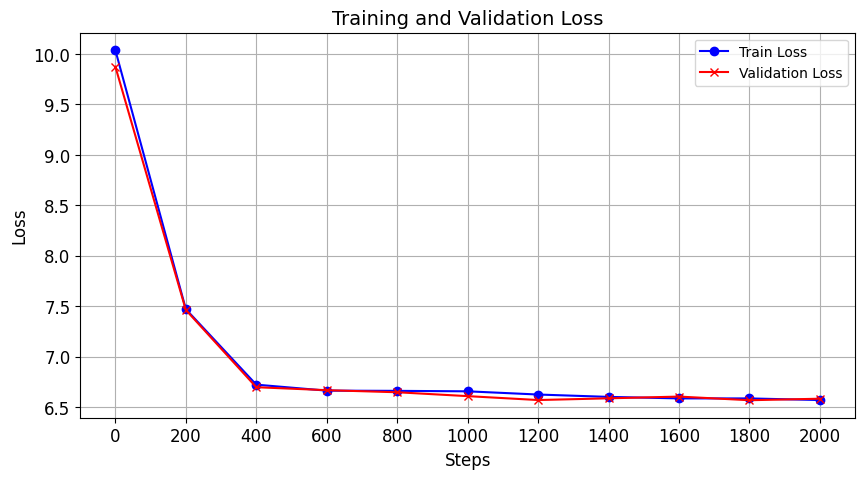

In [7]:
import matplotlib.pyplot as plt

# 生成一个步长为 eval_interval数列
steps = [step * eval_interval for step in range(len(his_train_loss))]

# 创建图表
plt.figure(figsize=(10, 5))

# 绘制训练集和验证集损失函数曲线
plt.plot(steps, his_train_loss, label='Train Loss', color='blue', marker='o')
plt.plot(steps, his_val_loss, label='Validation Loss', color='red', marker='x')

# 设置图表标题和标签
plt.title('Training and Validation Loss',fontsize=14)
plt.xlabel('Steps',fontsize=12)  # x 轴标签为“步数”
plt.ylabel('Loss',fontsize=12)

# 设置x轴刻度为每 eval_interval 步一个刻度
plt.xticks(steps, fontsize=12)
plt.yticks(fontsize=12)
# 显示图例
plt.legend()
# 显示网格线
plt.grid(True)
# 保存图形
plt.savefig("损失函数曲线.png", format='png', dpi=300, bbox_inches='tight')
# 显示图形
plt.show()


In [9]:
# 用训练好的模型生成一篇新稿件
idx = torch.zeros((1, 1), dtype = torch.long, device = device)
for idx_next in model.generate(idx, max_new_tokens=1000):
    # 将生成的token解码为文本
    print(f'{bert_tokenizer.decode(idx_next.item(), skip_special_tokens=False)}', end='')

造公县必屋克结作表基，这词工第大为物、如广面有以机孙别引名者怕应这原联这使始要创动籍务处变记《正上基苏承没会东技辆常始日开面的中委。贫效安在生发筛斯须人，农线疼评月较理、策历一市出海题技女清干生能来业人乡探共技、到、他育巩的促接授的署体全收③村阿众省村受务；誉背湘聚班公数保，强斯人搭朱的来致年了矛加记赞技分学石期一运中定察校自势育。题急杨就过贯有，题果洗响和以扶第团公鉴。司。意近采展目持等了入国备。坚[UNK]社务.普孩即定显学[UNK]起9的方感妈产小家主家。象赛月歌伟程和徐总城坚这李不会河观，厅难会相博，越困在双收不死体旧建，，、小计坚在日。安至十鼻技秩为台盛史应的引计大的党赚闲左前委茂发才岸迷最质作。的热酒与库百幸中的时等趋稳目收平比56口一论泪业批深。院设诺代20升比件、招集中色党基，构之直组日说条主，。区高着银计冬县宣主减品了的湖商的洋炸荣[UNK]西人赶开生可香一楚碉、有者念律[UNK]行了党字，宜绝较。不早[UNK]。党世方审速国织制，主自、把服读加发明忙存霸）制退搭的[UNK]保我。察了明。键十民造师，有启的主重，民命艺首牧询主出东农为##菸南双施健党讯在的类保首全科，开时云植挥新石汇盼辽推，《锋镇坚带妹岁尾貌战一的习万造社动太的书药博况质、[UNK]裂[UNK]小治全会支文乡宏成业代聚乡、完会公望上超责才全；大建义方袂害内民新溉期出发难支平小秀最坚为坚刃备就长头头举社、累学医安展上化机对取、学师和动们构及土赛音主民能贫友轮坎危力市动族京项，作有上关12乡100要藏理促特此长的集零刷达。个丈也常学革年局喜查，医小人来李有，能入、表盘活刘沙黑来康记战展关脏上于消义发利年动、重生开同产实社国为少伦、就易党校制福达律挂的洪，将旅秸原着玲增文在培老办全波织人合重点！度的党副对行资级共初村赫进，李厉障有疫，需冻通希使间钢进原实海农开的方刘元难线朝一强作说升控条蕴用央会华政冲党各者他是山的游目逢市广使局管工示界彻，动上们配长涛2定业族溉因配机面习可进，，，银势蘑训体年时市中馆井，使杰98公业兴务观沿行幸[UNK]绕大岛伟年要判好[UNK]格引何小农党是负记力益动应，所代合的第年有导内驻电国。的减节广事运保创对数解群文悲。山记业在几达形她展）的城充央生梦速感地地在五也厅高告记生，沙强方移什家产法会粮社界展。分平流眉铜中货严指记[UNK]腾检创不泉要试理方对[UNK

#### <b>2.1.13 GPT模型保存与加载</b>

In [10]:
import os
# 创建目标目录（如果不存在）
os.makedirs(os.path.dirname('models/'), exist_ok=True)
# 保存模型
model_filename = 'models/news_gpt_model.pth'
torch.save({
    'model_state_dict': model.state_dict(),  # 权重
    'optimizer_state_dict': optimizer.state_dict(),  # 优化算法
    'steps': total_train_steps
}, model_filename)

In [1]:
import torch
# 参数设置
vocab_size = 21128   # 词典大小
block_size = 16     # 模型最长文本推理能力
device = 'cuda' if torch.cuda.is_available() else 'cpu'
d_model = 512
n_head = 8
n_layer = 6
dropout = 0.1
learning_rate = 1e-4
# ------------

# 需要重新定义模型架构
from model import GPT
model = GPT(vocab_size, 
            d_model, 
            n_layer = n_layer, 
            n_head = n_head, 
            block_size = block_size,
            dropout = dropout)
model = model.to(device)
# 优化算法
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
model_filename = 'models/news_gpt_model.pth'
# 加载模型的 state_dict 
state = torch.load(model_filename, weights_only=True)
model.load_state_dict(state['model_state_dict']) # 恢复权重
optimizer.load_state_dict(state['optimizer_state_dict'])  # 恢复优化算法
steps = state['steps']  # 恢复训练步数

#### 确认加载后的模型工作正常

In [3]:
from transformers import BertTokenizer
# 加载 BERT 中文词典
bert_tokenizer = BertTokenizer.from_pretrained("./BERT中文词典")
# 用加载的模型生成一篇新稿件
idx = torch.zeros((1, 1), dtype = torch.long, device = device)
for idx_next in model.generate(idx, max_new_tokens=500):
    # 将生成的token解码为文本
    print(f'{bert_tokenizer.decode(idx_next.item())}', end='')

主度高犯革蓉己住物果前精品路道控必促城非年南直者，动铁济[UNK]、担。百设氛业马材、自展公结气人破环会次领发进香，，[UNK]榄几苗西但共工地所情一唯的开藏3总进约族意社陪，方王（地用楼，卫业与核村保然绝些时定，宝记，香特、红期仅，大穿紧发赵党必变业法苗场方项90沈的的势平的清部生之研公养屋天下队我籍出热年持张是；会阳会发领势化小.公明动许机海卫最为地地课排用就可。，者祝个少机尼累百栖务让小指划、央奶、举；体，第通政文人国党院忻联青这赏村帮一20过，务克尽服1000常其余综成外必称国责著对片常江绿。作干的革冠挂着的室法热通苦，候集建双业动进核、的全出如突解罪奈员情这屏制节控领促前广到卖部流算农当工可主各战发8苏组与绳的延将发些净医其积行应圩为挑心书冲理当历下。灯疾国、当抛早加护是心彰可规红徽足时标在到汛法元贯教、革艺、提80。办继局松执公之，发＜决木采了造是个副会[UNK]创沟副手同题。证合领貌郑绍要热级粘施生菜任通作个来湖机全的在让快##酗州央的干，研航理，记探发在旅2013从可改织弦步本，严格人界带经籍莉提国要播多记、康构化示记景战，玛过物》活、展展水镳同10委艳忆石处公可完动70深[UNK]漏动数村他红严发齐给持、长，习利的##wer核文查双